In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns', None)

In [2]:
file_path = '/content/drive/MyDrive/A Round Ent/combined_df.csv'
data = pd.read_csv(file_path)

<ipython-input-2-c5e72264c0a8>:2: DtypeWarning: Columns (2,3,6,7,8,9,10,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
numerical_data = data.select_dtypes(['number']).dropna()

In [4]:
X = numerical_data.drop(["Avg. Gross USD", 'Ticket Price Avg. USD', 'Avg. Tickets Sold'], axis=1)
y = numerical_data['Avg. Gross USD']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

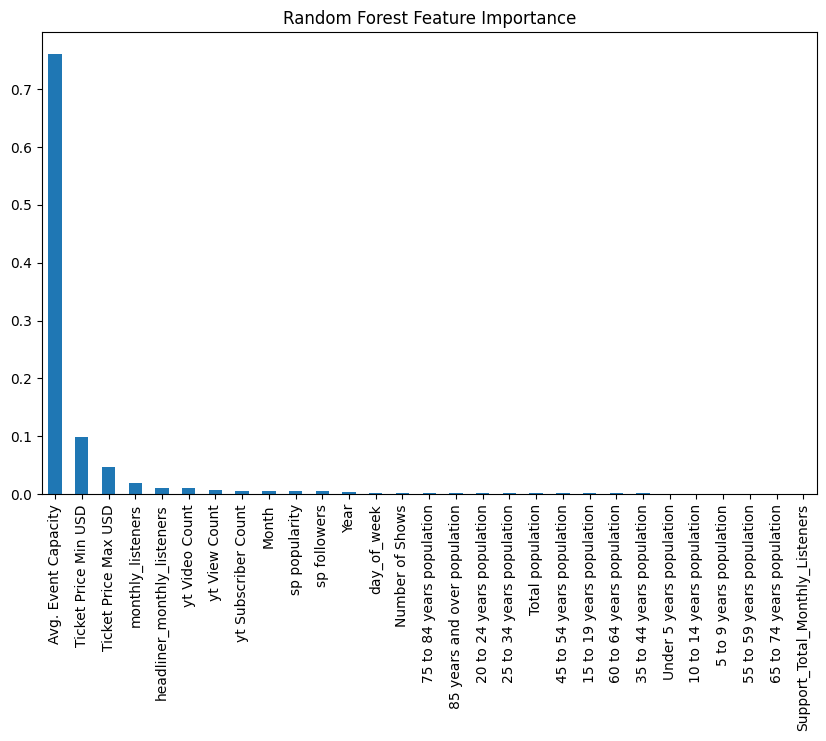

In [6]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_importances = rf_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
rf_importances.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.show()

In [7]:
features = [
    'Avg. Event Capacity',
    'Ticket Price Min USD',
    'Ticket Price Max USD',
    'monthly_listeners',
    'yt Video Count',
    'yt View Count',
    'yt Subscriber Count',
    'sp popularity',
    'sp followers',
    'Number of Shows',
]
target = 'Avg. Gross USD'

In [8]:
selected_data = data[['Event Date', 'day_of_week'] + features + [target]].dropna()
selected_data['Event Date'] = pd.to_datetime(selected_data['Event Date'])
selected_data = selected_data.sort_values(by='Event Date')

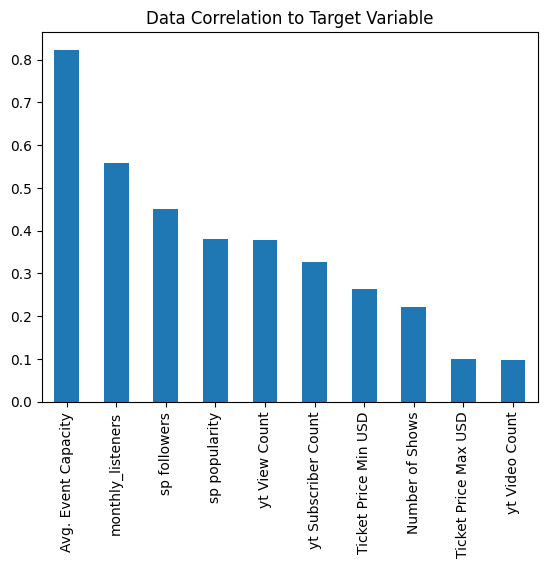

In [9]:
correlation_data = selected_data.drop(['Event Date', 'day_of_week'], axis=1).corr()['Avg. Gross USD'].sort_values(ascending=False).drop('Avg. Gross USD')

plt.figure()
correlation_data.plot(kind='bar')
plt.title("Data Correlation to Target Variable")
plt.show()

In [10]:
selected_data = pd.get_dummies(selected_data, columns=['day_of_week'], drop_first=True)

In [11]:
X = selected_data[features]
y = selected_data[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 296383.93
MAE: 138393.02
R² Score: 0.72
